# MMCV 세팅

In [ ]:
import torch

print(torch.__version__)

1.12.1+cu113


In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.1/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.1/index.html
     |████████████████████████████████| 575 kB 5.1 MB/s 
     |████████████████████████████████| 190 kB 64.1 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.6.2-cp37-cp37m-linux_x86_64.whl size=24339107 sha256=5400ab74584a59e95f958ad365d9426339e8563e243863aa3141d17b66d8fa69
  Stored in directory: /root/.cache/pip/wheels/51/0a/2c/990e1866b4c28e9a70ae3a0a304eeaf4711e85a87c647b8b79
Successfully built mmcv-full


In [ ]:
# mmdetection git clone

# !cd /content/drive/MyDrive
# !git clone https://github.com/open-mmlab/mmdetection.git
# !cd mmdetection; python setup.py install

In [ ]:
!cd /content/drive/MyDrive/mmdetection; python setup.py install

running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
copying build/lib/mmdet/version.py -> build/bdist.linux-x86_64/egg/mmdet
copying build/lib/mmdet/__init__.py -> build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/split_batch.py -> build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/replace_cfg_vals.py -> build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/misc.py -> build/bdist.linux-x86_64/egg

In [ ]:
# mmsegmentation git clone

# !git clone https://github.com/open-mmlab/mmsegmentation.git
# !cd mmdetection; python setup.py install

# 1. Images

## 1.2 Mask RCNN

In [ ]:
# 런타임->런타임 다시 시작 후 아래 수행. 
import os
import mmcv
from mmdet.apis import init_detector, inference_detector

In [ ]:
!cd drive/MyDrive/mmdetection; mkdir checkpoints

In [ ]:
!wget -O /content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2022-10-09 14:02:34--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.43
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

/content/drive/MyDr 100%[===================>] 242.32M  8.19MB/s    in 31s     

2022-10-09 14:03:07 (7.69 MB/s) - ‘/content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [ ]:
!ls -lia /content/drive/MyDrive/mmdetection/checkpoints

total 248135
7463 -rw------- 1 root root 254089599 Nov  2  2021 mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [ ]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정. 
config_file = '/content/drive/MyDrive/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = '/content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

In [ ]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class WATERDataset(CocoDataset):
  CLASSES = ('water', 'stone') 

In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

In [ ]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'WATERDataset'
cfg.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'WATERDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = ''

cfg.data.val.type = 'WATERDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = ''

cfg.data.test.type = 'WATERDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = ''

# class의 갯수를 pascal voc로 설정.  수정. 
cfg.model.roi_head.bbox_head.num_classes = 2
cfg.model.roi_head.mask_head.num_classes = 2

# pretrained 모델
cfg.load_from = '/content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm']
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# ConfigDict' object has no attribute 'device 오류 발생시 반드시 설정 필요. https://github.com/open-mmlab/mmdetection/issues/7901
cfg.device='cuda'

In [ ]:
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoi

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성. 
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=1.71s)
creating index...
index created!


In [ ]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('water', 'stone')


In [ ]:
import os.path as osp

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-10-09 14:03:16,364 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2022-10-09 14:03:16,834 - mmdet - INFO - load checkpoint from local path: /content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


Done (t=0.46s)
creating index...
index created!


2022-10-09 14:03:17,297 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([3, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([3]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([8, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 256, 1, 1]).
size mismatch for roi_head.mask_head.conv_logits.bias

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 166/166, 5.2 task/s, elapsed: 32s, ETA:     0s

2022-10-09 16:12:15,113 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-10-09 16:12:15,285 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.432
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.638
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.499
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.225
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.697
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.496
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.496
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.496
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.291
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.13s).
Accumulating evaluation results...
DONE (t=0.03s).
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*


/usr/local/lib/python3.7/dist-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-10-09 16:12:15,569 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.433
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.634
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.510
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large

DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.04s).


load checkpoint from local path: /content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps/epoch_12.pth


/usr/local/lib/python3.7/dist-packages/mmdet-2.25.2-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


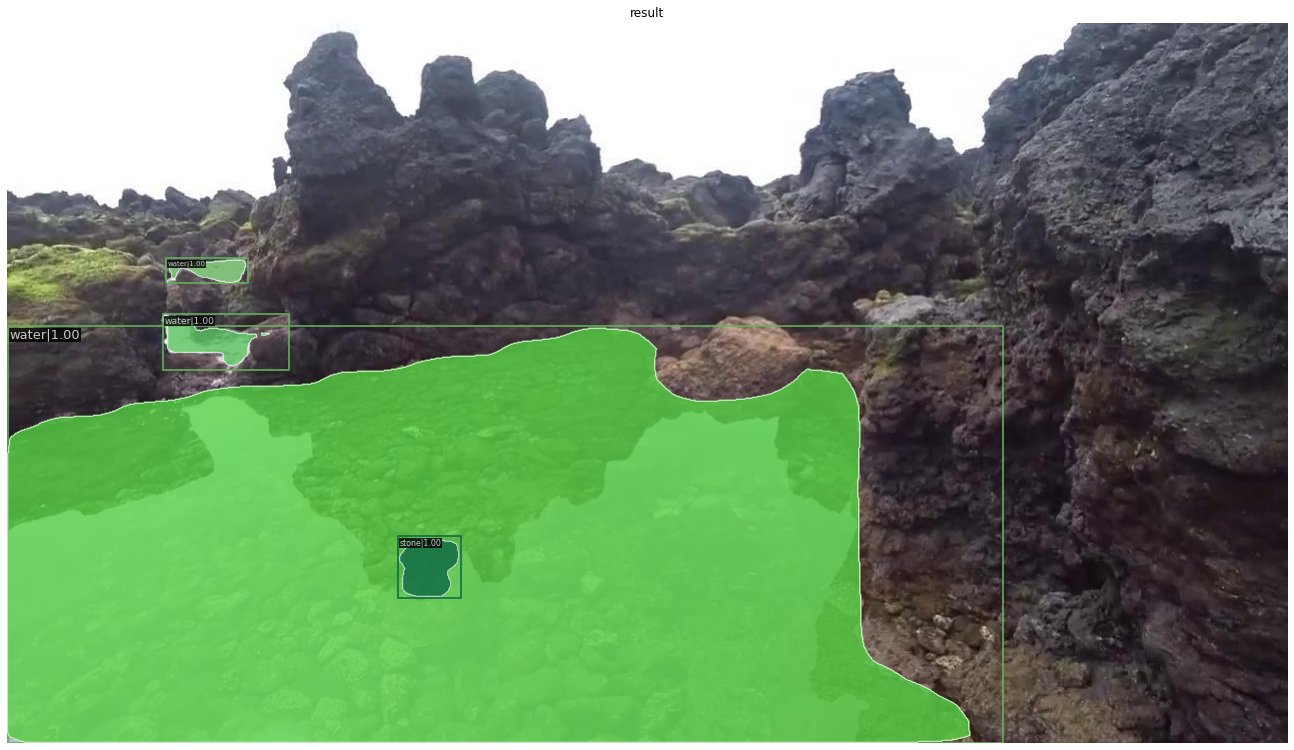

In [ ]:
import cv2
from mmdet.apis import show_result_pyplot

# train

# model.cfg = cfg
# result = inference_detector(model, img)
# show_result_pyplot(model, img, result)

checkpoint_file = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# BGR Image 사용 
img = cv2.imread('/content/drive/MyDrive/water detection/WATER_Dataset_coco/JPEGImages/00000999.jpg')
# model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.5)

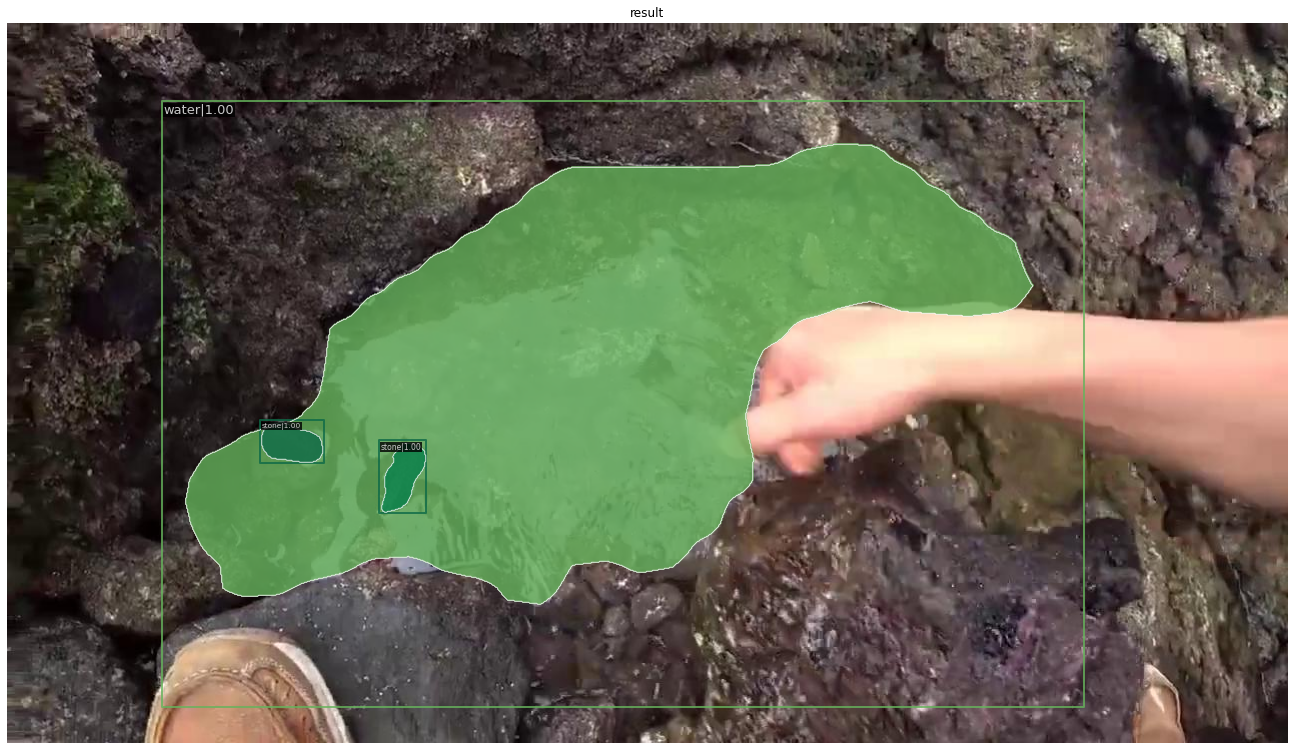

In [ ]:
# val
img = cv2.imread('/content/drive/MyDrive/water detection/WATER_Dataset_coco/JPEGImages/00002001.jpg')

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.5)

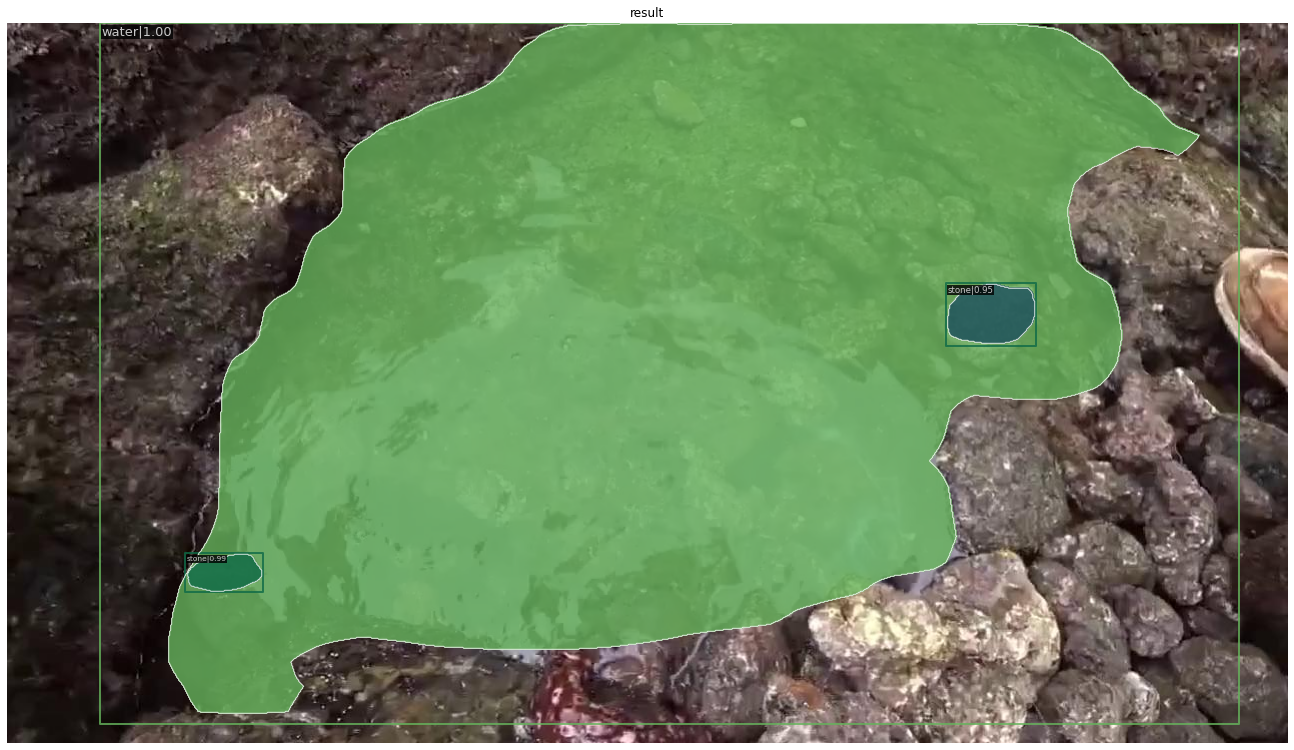

In [ ]:
# test 사진 확인
img = cv2.imread('/content/drive/MyDrive/water detection/WATER_Dataset_coco/JPEGImages/00002460.jpg')

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.5)

### 테스트 데이터 세트에 Inference 및 Evaluation 적용하기
* 런타임 다시 시작 수행 필요(버그?) -> 안 해도 진행이 됐음
* tools/test.py 스크립트는 colab에서 오류 발생
* 테스트용 Dataset과 DataLoader생성하고 single_gpu_test()를 호출하여 inference 결과를 반환. batch_size를 1로 설정하지 않으면 single_gpu_test() 오류 발생

In [ ]:
from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed


@DATASETS.register_module(force=True)
class WATERDataset(CocoDataset):
  CLASSES = ('water', 'stone') 

config_file = '/content/drive/MyDrive/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = '/content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

cfg = Config.fromfile(config_file)

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'WATERDataset'
cfg.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'WATERDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = ''

cfg.data.val.type = 'WATERDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = ''

cfg.data.test.type = 'WATERDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = ''

# class의 갯수를 pascal voc로 설정.  수정. 
cfg.model.roi_head.bbox_head.num_classes = 2
cfg.model.roi_head.mask_head.num_classes = 2

# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm']
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# bug(?)로 인해 test용 dataset evaluation 시 1로 설정. data loader에서 GPU갯수별 Batch size 임. 
cfg.data.samples_per_gpu = 1

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# ConfigDict' object has no attribute 'device 오류 발생시 반드시 설정 필요. https://github.com/open-mmlab/mmdetection/issues/7901
cfg.device='cuda'

In [ ]:
cfg.dump('/content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps/mask_rcnn_conf.py')

In [ ]:
# !mkdir -p /content/drive/MyDrive/show_test_output

In [ ]:
# # tools/test.py 는 colab에서 제대로 동작하지 않음. 
# %cd /content/drive/MyDrive/mmdetection
# !python tools/test.py /content/drive/MyDrive/tutorial_exps/mask_rcnn_conf.py /content/tutorial_exps/epoch_12.pth \
# --eval 'bbox' \
# --show-dir /content/show_test_output

In [ ]:
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이.
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        samples_per_gpu=cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

# 반드시 아래 코드에서 'img' 키값이 tensor로 출력되어야 함. 
next(iter(data_loader))

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


{'img_metas': [DataContainer([[{'filename': '/content/drive/MyDrive/water detection/WATER_Dataset_coco/JPEGImages/00004785.jpg', 'ori_filename': 'JPEGImages/00004785.jpg', 'ori_shape': (720, 1280, 3), 'img_shape': (750, 1333, 3), 'pad_shape': (768, 1344, 3), 'scale_factor': array([1.0414063, 1.0416666, 1.0414063, 1.0416666], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[-0.5253, -0.5253, -0.5253,  ...,  0.0000,  0.0000,  0.0000],
            [-0.5424, -0.5424, -0.5253,  ...,  0.0000,  0.0000,  0.0000],
            [-0.5424, -0.5424, -0.5424,  ...,  0.0000,  0.0000,  0.0000],
            ...,
            [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
            [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
            [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps/epoch_12.pth


In [ ]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/drive/MyDrive/water detection/WATER_Dataset_coco/show_test_output', 0.3)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 153/153, 2.3 task/s, elapsed: 66s, ETA:     0s

In [ ]:
metric = dataset.evaluate(outputs, metric=['bbox', 'segm'])
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.03s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.338
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.518
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.386
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.233
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.501
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.455
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.455
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.455
 Average Recall     (AR) @[ IoU=0.50:0.95

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.2-py3.7.egg/mmdet/datasets/coco.py:474: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)


DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.04s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.349
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.480
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.424
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.552
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.464
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.464
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.464
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.158
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

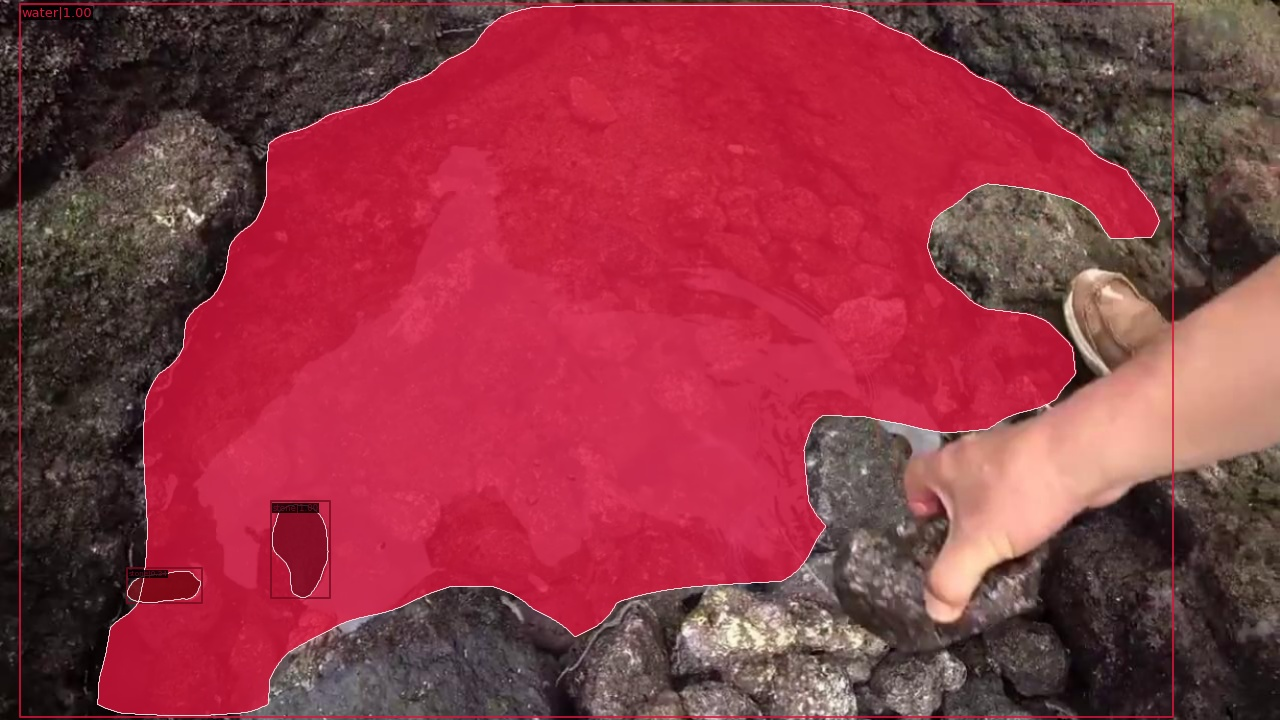

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/water detection/WATER_Dataset_coco/show_test_output/JPEGImages/00002217.jpg')

cv2_imshow(img)

# 2. Video

## 2.1 Mask RCNN - images로 학습한 모델로 inference 실행

In [ ]:
# RAM을 다 사용해서 런타임 다시 실행됨

import mmcv
import cv2
from mmdet.apis import init_detector, inference_detector
from mmcv import Config

In [ ]:
config_file = '/content/drive/MyDrive/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
cfg = Config.fromfile(config_file)

In [ ]:
from mmdet.apis import set_random_seed
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class WATERDataset(CocoDataset):
  CLASSES = ('water', 'stone') 

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'WATERDataset'
cfg.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'WATERDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = ''

cfg.data.val.type = 'WATERDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = ''

cfg.data.test.type = 'WATERDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = ''

# class의 갯수를 pascal voc로 설정.  수정. 
cfg.model.roi_head.bbox_head.num_classes = 2
cfg.model.roi_head.mask_head.num_classes = 2

# pretrained 모델
cfg.load_from = '/content/drive/MyDrive/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm']
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# ConfigDict' object has no attribute 'device 오류 발생시 반드시 설정 필요. https://github.com/open-mmlab/mmdetection/issues/7901
cfg.device='cuda'

In [ ]:
checkpoint_file = '/content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps/epoch_12.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/drive/MyDrive/water detection/WATER_Dataset_coco/tutorial_exps/epoch_12.pth


In [ ]:
video_reader = mmcv.VideoReader('/content/drive/MyDrive/water detection/WATER_Dataset_coco/water_test.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/drive/MyDrive/water detection/WATER_Dataset_coco/water_test_output.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model_ckpt, frame)
  frame = model_ckpt.show_result(frame, result, score_thr=0.5)

  video_writer.write(frame)

if video_writer:
        video_writer.release()

# 런타임 다시 시작하기

[                                                  ] 0/1368, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.2-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1368/1368, 2.6 task/s, elapsed: 535s, ETA:     0s


In [ ]:
video_reader = mmcv.VideoReader('/content/drive/MyDrive/water detection/WATER_Dataset_coco/water_half1.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/drive/MyDrive/water detection/WATER_Dataset_coco/water_half1_output.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model_ckpt, frame)
  frame = model_ckpt.show_result(frame, result, score_thr=0.5)

  video_writer.write(frame)

if video_writer:
        video_writer.release()

# 런타임 다시 시작하기

[                                                  ] 0/2439, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.2-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2439/2439, 2.5 task/s, elapsed: 989s, ETA:     0s


In [ ]:
video_reader = mmcv.VideoReader('/content/drive/MyDrive/water detection/WATER_Dataset_coco/water_half2.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/drive/MyDrive/water detection/WATER_Dataset_coco/water_half2_output.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model_ckpt, frame)
  frame = model_ckpt.show_result(frame, result, score_thr=0.5)

  video_writer.write(frame)

if video_writer:
        video_writer.release()

[                                                  ] 0/2460, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.2-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2460/2460, 2.6 task/s, elapsed: 934s, ETA:     0s
